# Hand Written Digit Prediction

The digits consists of 8X8 pixel images of digits. The images attribute of the dataset stores 8X8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents.

# Objective

The objective of this project is to build a machine learning model that can accurately predict handwritten digits.

# Data Source

The dataset used for this project is the "digits" dataset from scikit-learn's built-in datasets. It contains images of handwritten digits, where each image is an 8X8 pixel matrix, and the target variable represents the actual digit value (0-9).

# Import Library

In [22]:
import pandas as pd

In [23]:
import numpy as np

In [24]:
import matplotlib.pyplot as plt

# Import Data

In [25]:
from sklearn.datasets import load_digits

In [26]:
df =load_digits()

# Data Visualization

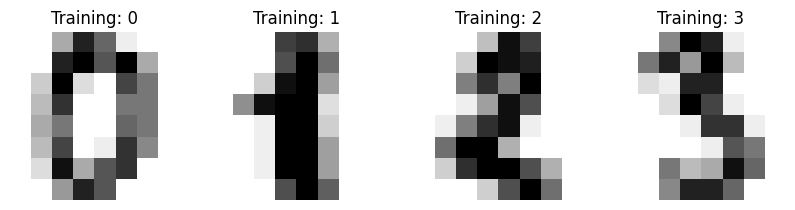

In [28]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

# Data Preprocessing

In [29]:
df.images.shape

(1797, 8, 8)

In [30]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [31]:
df.images[0].shape

(8, 8)

In [32]:
len(df.images)

1797

In [34]:
n_samples=len(df.images)
data =df.images.reshape((n_samples,-1))

In [35]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [36]:
data[0].shape

(64,)

In [37]:
data.shape

(1797, 64)

# Scaling Image Data

In [38]:
data.min()

0.0

In [40]:
data.max()

16.0

In [41]:
data=data/16

In [42]:
data.min()

0.0

In [43]:
data.max()

1.0

In [44]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# Train Test Split Data

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)

In [47]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# Modeling

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf=RandomForestClassifier()

In [50]:
rf.fit(x_train,y_train)

RandomForestClassifier()

# Model Precdiction

In [51]:
y_pred = rf.predict(x_test)

In [52]:
y_pred

array([0, 8, 7, 3, 3, 5, 0, 6, 6, 4, 3, 1, 6, 2, 7, 4, 5, 5, 2, 4, 6, 3,
       9, 0, 6, 2, 7, 0, 9, 1, 9, 4, 9, 6, 2, 6, 0, 5, 8, 6, 1, 9, 6, 2,
       9, 1, 8, 9, 8, 1, 3, 5, 3, 2, 0, 6, 8, 9, 2, 6, 3, 1, 8, 6, 0, 8,
       3, 3, 1, 4, 4, 0, 0, 4, 4, 2, 3, 4, 8, 6, 5, 0, 4, 8, 1, 8, 7, 7,
       4, 2, 0, 0, 6, 3, 3, 3, 3, 0, 7, 1, 5, 7, 2, 2, 6, 4, 5, 9, 4, 2,
       4, 2, 7, 8, 2, 9, 0, 9, 6, 0, 7, 1, 5, 4, 9, 2, 9, 5, 5, 7, 0, 0,
       5, 7, 7, 2, 5, 7, 6, 5, 4, 6, 5, 0, 9, 6, 5, 6, 4, 2, 3, 0, 1, 6,
       8, 9, 2, 0, 5, 5, 9, 7, 2, 4, 7, 9, 8, 5, 8, 8, 9, 0, 3, 3, 9, 2,
       2, 9, 6, 7, 4, 4, 9, 2, 4, 2, 9, 7, 8, 9, 6, 1, 0, 6, 5, 2, 7, 6,
       2, 3, 3, 2, 9, 4, 9, 2, 9, 7, 4, 8, 2, 1, 8, 5, 4, 0, 8, 6, 5, 8,
       3, 9, 6, 9, 0, 3, 7, 0, 7, 0, 8, 1, 7, 2, 4, 3, 7, 1, 7, 7, 1, 7,
       2, 8, 6, 1, 7, 2, 2, 6, 7, 8, 0, 3, 2, 0, 4, 0, 4, 0, 0, 7, 0, 2,
       7, 8, 6, 9, 8, 1, 0, 9, 3, 9, 0, 6, 1, 9, 1, 8, 0, 7, 1, 1, 9, 0,
       4, 3, 0, 9, 1, 8, 5, 3, 6, 5, 7, 7, 2, 0, 6,

# Model Evaluation

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

In [54]:
confusion_matrix(y_test,y_pred)

array([[56,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1, 55,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0, 44,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 50,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 48,  1,  0,  1,  2],
       [ 0,  0,  0,  0,  1,  0, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 57,  1,  0],
       [ 0,  0,  2,  1,  0,  0,  0,  1, 49,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 60]])

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        56
           1       0.98      1.00      0.99        49
           2       0.96      0.96      0.96        57
           3       0.98      0.98      0.98        45
           4       0.98      0.98      0.98        51
           5       0.96      0.92      0.94        52
           6       0.98      0.98      0.98        57
           7       0.98      0.98      0.98        58
           8       0.94      0.92      0.93        53
           9       0.97      0.97      0.97        62

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



# Explaination

The Given Problem is a Classification Supervised Machine Learning Problem.

Random Forest Classifier is the statistical model used for classifaction and predictive analysis.

Train Test Split is the way to split the data frame into two parts where one part is for training of the model while the other one is for testing the trained model.